In [3]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import datetime as dt
import math
import numpy as np
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt
import json

In [4]:
june = pd.read_csv('../data/june.csv/june.csv')

In [5]:
june.sumdgroup.unique()

array(['scooter', 'Scooter', 'bicycle'], dtype=object)

In [6]:
june_scooters = june.loc[june.sumdgroup.isin(['scooter', 'Scooter'])]

In [7]:
june_scooters = june_scooters[[ 'companyname', 'sumdid', 'chargelevel','pubdatetime', 'latitude', 'longitude']]

In [8]:
june_scooters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28037408 entries, 0 to 28046094
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   companyname  object 
 1   sumdid       object 
 2   chargelevel  float64
 3   pubdatetime  object 
 4   latitude     float64
 5   longitude    float64
dtypes: float64(3), object(3)
memory usage: 1.5+ GB


In [9]:
june_scooters.to_pickle("../data/june.pkl")

In [10]:
june_scooters.pubdatetime = pd.to_datetime(june_scooters.pubdatetime)

In [11]:
june_scooters.head()

,companyname,sumdid,chargelevel,pubdatetime,latitude,longitude
0,Jump,Powered93627c35-0f62-5b81-a78d-75a4a92ecf47,90.0,2019-06-01 00:00:12,36.1202,-86.7534
1,Jump,Powered17715097-e8a0-5494-a5ab-9b625796607d,63.0,2019-06-01 00:00:12,36.1630,-86.7765
2,Jump,Powerede5cb95ae-b091-5a93-86fa-ededd946d0d7,77.0,2019-06-01 00:00:12,36.1202,-86.7533
3,Jump,Powered71fa5e4f-1e17-54c4-936d-330df38cc2fa,0.0,2019-06-01 00:00:12,36.1201,-86.7530
4,Jump,Poweredfa549dd6-40bb-5757-ac87-2c2528f2bc68,2.0,2019-06-01 00:00:12,36.1622,-86.7806


In [71]:
june_companyname = june_scooters['companyname'].value_counts()

<AxesSubplot:>

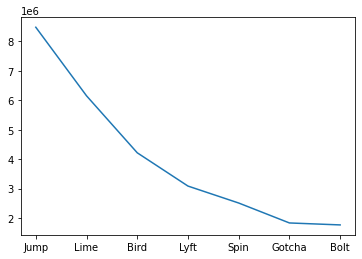

In [72]:
june_companyname.plot()

In [12]:
june_scooters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28037408 entries, 0 to 28046094
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   companyname  object        
 1   sumdid       object        
 2   chargelevel  float64       
 3   pubdatetime  datetime64[ns]
 4   latitude     float64       
 5   longitude    float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 1.5+ GB


In [13]:
june_scooters['date'] = june_scooters['pubdatetime'].dt.date

In [14]:
june_scooters.date = pd.to_datetime(june_scooters.date)

To round down to closest 15, this should work

15 * math.floor(number/15)


In [15]:
june_scooters.isnull().sum()

companyname      0
sumdid           0
chargelevel    285
pubdatetime      0
latitude         0
longitude        0
date             0
dtype: int64

In [16]:
june_scooters = june_scooters.dropna()

In [17]:
june_scooters

,companyname,sumdid,chargelevel,pubdatetime,latitude,longitude,date
0,Jump,Powered93627c35-0f62-5b81-a78d-75a4a92ecf47,90.0,2019-06-01 00:00:12.000,36.120200,-86.753400,2019-06-01
1,Jump,Powered17715097-e8a0-5494-a5ab-9b625796607d,63.0,2019-06-01 00:00:12.000,36.163000,-86.776500,2019-06-01
2,Jump,Powerede5cb95ae-b091-5a93-86fa-ededd946d0d7,77.0,2019-06-01 00:00:12.000,36.120200,-86.753300,2019-06-01
3,Jump,Powered71fa5e4f-1e17-54c4-936d-330df38cc2fa,0.0,2019-06-01 00:00:12.000,36.120100,-86.753000,2019-06-01
4,Jump,Poweredfa549dd6-40bb-5757-ac87-2c2528f2bc68,2.0,2019-06-01 00:00:12.000,36.162200,-86.780600,2019-06-01
...,...,...,...,...,...,...,...
28046090,Lime,PoweredZYNSVOII2QSLD,100.0,2019-06-30 23:59:55.273,36.125567,-86.776982,2019-06-30
28046091,Lime,PoweredXOPAIWGL7SF62,93.0,2019-06-30 23:59:55.273,36.121717,-86.775207,2019-06-30
28046092,Lime,PoweredBYKFOWELGPKH6,61.0,2019-06-30 23:59:55.273,36.127046,-86.777262,2019-06-30
28046093,Lime,PoweredIAAQ7WODYXON7,35.0,2019-06-30 23:59:55.273,36.123775,-86.790115,2019-06-30


In [18]:
june_scooters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28037123 entries, 0 to 28046094
Data columns (total 7 columns):
 #   Column       Dtype         
---  ------       -----         
 0   companyname  object        
 1   sumdid       object        
 2   chargelevel  float64       
 3   pubdatetime  datetime64[ns]
 4   latitude     float64       
 5   longitude    float64       
 6   date         datetime64[ns]
dtypes: datetime64[ns](2), float64(3), object(2)
memory usage: 1.7+ GB


In [19]:
june_scooters['date'] = june_scooters['pubdatetime'].dt.date

In [20]:
june_scooters['hour'] = june_scooters['pubdatetime'].dt.hour

In [21]:
june_scooters['minute'] = june_scooters['pubdatetime'].dt.minute

In [22]:
june_scooters.head()

,companyname,sumdid,chargelevel,pubdatetime,latitude,longitude,date,hour,minute
0,Jump,Powered93627c35-0f62-5b81-a78d-75a4a92ecf47,90.0,2019-06-01 00:00:12,36.1202,-86.7534,2019-06-01,0,0
1,Jump,Powered17715097-e8a0-5494-a5ab-9b625796607d,63.0,2019-06-01 00:00:12,36.1630,-86.7765,2019-06-01,0,0
2,Jump,Powerede5cb95ae-b091-5a93-86fa-ededd946d0d7,77.0,2019-06-01 00:00:12,36.1202,-86.7533,2019-06-01,0,0
3,Jump,Powered71fa5e4f-1e17-54c4-936d-330df38cc2fa,0.0,2019-06-01 00:00:12,36.1201,-86.7530,2019-06-01,0,0
4,Jump,Poweredfa549dd6-40bb-5757-ac87-2c2528f2bc68,2.0,2019-06-01 00:00:12,36.1622,-86.7806,2019-06-01,0,0


In [23]:
june_scooters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28037123 entries, 0 to 28046094
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   companyname  object        
 1   sumdid       object        
 2   chargelevel  float64       
 3   pubdatetime  datetime64[ns]
 4   latitude     float64       
 5   longitude    float64       
 6   date         object        
 7   hour         int64         
 8   minute       int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 2.1+ GB


In [24]:
june_scooters['roundedtime'] = june_scooters['minute'].apply(lambda x: 15*round(x/15))

In [25]:
june_scooters = june_scooters.round({'latitude': 3})

In [26]:
june_scooters = june_scooters.round({'longitude': 3})

In [27]:
june_scooters

,companyname,sumdid,chargelevel,pubdatetime,latitude,longitude,date,hour,minute,roundedtime
0,Jump,Powered93627c35-0f62-5b81-a78d-75a4a92ecf47,90.0,2019-06-01 00:00:12.000,36.120,-86.753,2019-06-01,0,0,0
1,Jump,Powered17715097-e8a0-5494-a5ab-9b625796607d,63.0,2019-06-01 00:00:12.000,36.163,-86.776,2019-06-01,0,0,0
2,Jump,Powerede5cb95ae-b091-5a93-86fa-ededd946d0d7,77.0,2019-06-01 00:00:12.000,36.120,-86.753,2019-06-01,0,0,0
3,Jump,Powered71fa5e4f-1e17-54c4-936d-330df38cc2fa,0.0,2019-06-01 00:00:12.000,36.120,-86.753,2019-06-01,0,0,0
4,Jump,Poweredfa549dd6-40bb-5757-ac87-2c2528f2bc68,2.0,2019-06-01 00:00:12.000,36.162,-86.781,2019-06-01,0,0,0
...,...,...,...,...,...,...,...,...,...,...
28046090,Lime,PoweredZYNSVOII2QSLD,100.0,2019-06-30 23:59:55.273,36.126,-86.777,2019-06-30,23,59,60
28046091,Lime,PoweredXOPAIWGL7SF62,93.0,2019-06-30 23:59:55.273,36.122,-86.775,2019-06-30,23,59,60
28046092,Lime,PoweredBYKFOWELGPKH6,61.0,2019-06-30 23:59:55.273,36.127,-86.777,2019-06-30,23,59,60
28046093,Lime,PoweredIAAQ7WODYXON7,35.0,2019-06-30 23:59:55.273,36.124,-86.790,2019-06-30,23,59,60


In [30]:
agg_time_scooters = june_scooters.loc[:,["latitude", "longitude", "date", "hour", "roundedtime", "sumdid"]]\
    .groupby(["latitude", "longitude", "date", "hour", "roundedtime"])\
    .agg({"sumdid": pd.Series.nunique})\
    .reset_index()


In [31]:
agg_time_scooters.head()

,latitude,longitude,date,hour,roundedtime,sumdid
0,0.0,0.0,2019-06-03,13,15,1
1,0.0,0.0,2019-06-03,13,30,1
2,0.0,0.0,2019-06-03,13,45,1
3,0.0,0.0,2019-06-03,13,60,1
4,0.0,0.0,2019-06-03,14,0,1


In [32]:
agg_time_scooters.drop(agg_time_scooters.loc[agg_time_scooters['latitude']==0].index, inplace=True)

In [33]:
agg_time_scooters

,latitude,longitude,date,hour,roundedtime,sumdid
1191,26.119,-80.139,2019-06-22,3,15,1
1192,26.119,-80.139,2019-06-22,3,30,1
1193,26.119,-80.139,2019-06-22,3,45,1
1194,26.119,-80.139,2019-06-22,3,60,1
1195,26.119,-80.139,2019-06-22,4,0,1
...,...,...,...,...,...,...
3273374,42.718,-88.993,2019-06-09,0,60,1
3273375,42.718,-88.993,2019-06-09,1,0,1
3273376,42.718,-88.993,2019-06-09,1,15,1
3273377,42.718,-88.993,2019-06-09,1,30,1


In [34]:
agg_time_scooters.sort_values('sumdid', ascending = False).head(10)

,latitude,longitude,date,hour,roundedtime,sumdid
126438,36.12,-86.753,2019-06-29,5,30,664
126463,36.12,-86.753,2019-06-29,10,30,664
126462,36.12,-86.753,2019-06-29,10,15,662
126434,36.12,-86.753,2019-06-29,4,45,662
126459,36.12,-86.753,2019-06-29,9,45,662
126461,36.12,-86.753,2019-06-29,10,0,662
126442,36.12,-86.753,2019-06-29,6,15,661
126458,36.12,-86.753,2019-06-29,9,30,661
126441,36.12,-86.753,2019-06-29,6,0,660
126439,36.12,-86.753,2019-06-29,5,45,660


In [35]:
agg_time_scooters.drop(agg_time_scooters.loc[(agg_time_scooters['latitude']==36.12) & (agg_time_scooters['longitude'] == -86.753)].index, inplace=True)

In [36]:
agg_time_scooters.drop(agg_time_scooters.loc[(agg_time_scooters['latitude']==36.12) & (agg_time_scooters['longitude'] == -86.754)].index, inplace=True)

In [37]:
agg_time_scooters.sort_values('sumdid', ascending = False).head(10000)

,latitude,longitude,date,hour,roundedtime,sumdid
149718,36.121,-86.770,2019-06-12,5,45,153
149717,36.121,-86.770,2019-06-12,5,30,152
149728,36.121,-86.770,2019-06-12,7,45,150
149733,36.121,-86.770,2019-06-12,8,45,150
149730,36.121,-86.770,2019-06-12,8,0,149
...,...,...,...,...,...,...
2113056,36.161,-86.777,2019-06-23,16,45,37
2565191,36.169,-86.773,2019-06-08,1,15,37
2113069,36.161,-86.777,2019-06-23,19,15,37
2113072,36.161,-86.777,2019-06-23,19,60,37


df= unique scooters, lat & long, date , hour, roundtime

In [38]:
agg_time_scooters.drop(agg_time_scooters.loc[agg_time_scooters['sumdid']>50].index, inplace=True)

In [39]:
agg_time_scooters.sort_values('sumdid', ascending = False)

,latitude,longitude,date,hour,roundedtime,sumdid
1648623,36.155,-86.785,2019-06-08,0,0,50
2241771,36.163,-86.776,2019-06-24,18,0,50
1648879,36.155,-86.785,2019-06-10,3,15,50
2164237,36.162,-86.778,2019-06-06,20,30,50
2323323,36.164,-86.769,2019-06-20,6,15,50
...,...,...,...,...,...,...
1293231,36.151,-86.794,2019-06-21,3,45,1
1293230,36.151,-86.794,2019-06-21,3,30,1
1293229,36.151,-86.794,2019-06-21,3,15,1
1293228,36.151,-86.794,2019-06-21,1,15,1


In [40]:
agg_time_scooters.sort_values('sumdid', ascending = True)

,latitude,longitude,date,hour,roundedtime,sumdid
1191,26.119,-80.139,2019-06-22,3,15,1
1900161,36.158,-86.785,2019-06-24,12,0,1
1900159,36.158,-86.785,2019-06-24,7,45,1
1900158,36.158,-86.785,2019-06-24,5,30,1
1900157,36.158,-86.785,2019-06-24,0,45,1
...,...,...,...,...,...,...
1650701,36.155,-86.785,2019-06-25,8,45,50
2066840,36.160,-86.773,2019-06-26,1,30,50
2323331,36.164,-86.769,2019-06-20,7,60,50
1650662,36.155,-86.785,2019-06-25,0,60,50


Create 2 dataframes: 1 weekends the other weekdays
1- reformat days to group
2

In [41]:
agg_time_scooters['date']=pd.to_datetime(agg_time_scooters.date)

In [42]:
agg_time_scooters['day_of_week'] = agg_time_scooters.date.dt.strftime("%w")

In [43]:
agg_time_scooters.head()

,latitude,longitude,date,hour,roundedtime,sumdid,day_of_week
1191,26.119,-80.139,2019-06-22,3,15,1,6
1192,26.119,-80.139,2019-06-22,3,30,1,6
1193,26.119,-80.139,2019-06-22,3,45,1,6
1194,26.119,-80.139,2019-06-22,3,60,1,6
1195,26.119,-80.139,2019-06-22,4,0,1,6


In [44]:
agg_time_scooters['day_of_week'] = agg_time_scooters.day_of_week.astype(int)

In [45]:
weekend_scooters = agg_time_scooters[agg_time_scooters['day_of_week'].isin([6,0])]

In [46]:
weekday_scooters = agg_time_scooters[agg_time_scooters['day_of_week'].isin([1,2,3,4,5])]

In [47]:
weekend_scooters

,latitude,longitude,date,hour,roundedtime,sumdid,day_of_week
1191,26.119,-80.139,2019-06-22,3,15,1,6
1192,26.119,-80.139,2019-06-22,3,30,1,6
1193,26.119,-80.139,2019-06-22,3,45,1,6
1194,26.119,-80.139,2019-06-22,3,60,1,6
1195,26.119,-80.139,2019-06-22,4,0,1,6
...,...,...,...,...,...,...,...
3273374,42.718,-88.993,2019-06-09,0,60,1,0
3273375,42.718,-88.993,2019-06-09,1,0,1,0
3273376,42.718,-88.993,2019-06-09,1,15,1,0
3273377,42.718,-88.993,2019-06-09,1,30,1,0


In [48]:
weekday_scooters

,latitude,longitude,date,hour,roundedtime,sumdid,day_of_week
1415,26.119,-80.139,2019-06-24,0,0,1,1
1416,26.119,-80.139,2019-06-24,0,15,1,1
1417,26.119,-80.139,2019-06-24,0,30,1,1
1418,26.119,-80.139,2019-06-24,0,45,1,1
1419,26.119,-80.139,2019-06-24,0,60,1,1
...,...,...,...,...,...,...,...
3273322,42.491,-89.040,2019-06-18,14,60,1,2
3273323,42.491,-89.040,2019-06-18,15,0,1,2
3273324,42.491,-89.040,2019-06-18,15,15,1,2
3273325,42.491,-89.040,2019-06-18,15,30,1,2


In [49]:
agg_time_scooters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3259377 entries, 1191 to 3273378
Data columns (total 7 columns):
 #   Column       Dtype         
---  ------       -----         
 0   latitude     float64       
 1   longitude    float64       
 2   date         datetime64[ns]
 3   hour         int64         
 4   roundedtime  int64         
 5   sumdid       int64         
 6   day_of_week  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(3)
memory usage: 186.5 MB


In [50]:
weekend_scooters['geometry'] = weekend_scooters.apply(lambda x: Point((x.longitude, 
                                                         x.latitude)), 
                                        axis=1)
weekend_scooters.head(3)

C:\Users\ferralme\AppData\Local\Temp/ipykernel_18496/1441982155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekend_scooters['geometry'] = weekend_scooters.apply(lambda x: Point((x.longitude,


,latitude,longitude,date,hour,roundedtime,sumdid,day_of_week,geometry
1191,26.119,-80.139,2019-06-22,3,15,1,6,POINT (-80.139 26.119)
1192,26.119,-80.139,2019-06-22,3,30,1,6,POINT (-80.139 26.119)
1193,26.119,-80.139,2019-06-22,3,45,1,6,POINT (-80.139 26.119)


In [51]:
weekend_scooters = gpd.GeoDataFrame(weekend_scooters, 
                           crs = 'EPSG:4326', 
                           geometry = weekend_scooters['geometry'])
weekend_scooters.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1062157 entries, 1191 to 3273378
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   latitude     1062157 non-null  float64       
 1   longitude    1062157 non-null  float64       
 2   date         1062157 non-null  datetime64[ns]
 3   hour         1062157 non-null  int64         
 4   roundedtime  1062157 non-null  int64         
 5   sumdid       1062157 non-null  int64         
 6   day_of_week  1062157 non-null  int32         
 7   geometry     1062157 non-null  geometry      
dtypes: datetime64[ns](1), float64(2), geometry(1), int32(1), int64(3)
memory usage: 68.9 MB


In [52]:
weekend_scooters['latitude'].isnull().count()

1062157

In [53]:
weekend_scooters.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1062157 entries, 1191 to 3273378
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   latitude     1062157 non-null  float64       
 1   longitude    1062157 non-null  float64       
 2   date         1062157 non-null  datetime64[ns]
 3   hour         1062157 non-null  int64         
 4   roundedtime  1062157 non-null  int64         
 5   sumdid       1062157 non-null  int64         
 6   day_of_week  1062157 non-null  int32         
 7   geometry     1062157 non-null  geometry      
dtypes: datetime64[ns](1), float64(2), geometry(1), int32(1), int64(3)
memory usage: 68.9 MB


In [54]:
type(weekend_scooters)

geopandas.geodataframe.GeoDataFrame

In [55]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

epsg:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [56]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [57]:
weekend_scooters_june = gpd.GeoDataFrame(weekend_scooters, 
                           crs = zipcodes.crs, 
                           geometry = weekend_scooters['geometry'])

KeyboardInterrupt: 

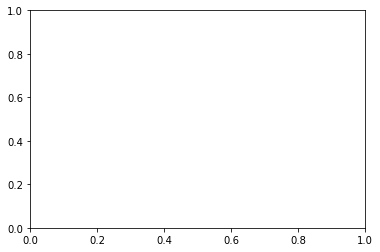

In [58]:
weekend_scooters_june.plot()

In [59]:
type(weekend_scooters_june)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

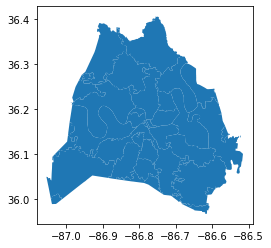

In [60]:
zipcodes.plot()

In [61]:
weekend_june_map = gpd.sjoin(weekend_scooters_june, zipcodes, op = 'within')

In [62]:
weekend_june_map.head()

,latitude,longitude,date,hour,roundedtime,sumdid,day_of_week,geometry,index_right,zip,objectid,po_name,shape_stlength,shape_starea
25508,36.0,-86.672,2019-06-01,23,15,1,6,POINT (-86.67200 36.00000),51,37013,34,ANTIOCH,349164.88029162859,1150567551.5894165
25509,36.0,-86.672,2019-06-01,23,30,1,6,POINT (-86.67200 36.00000),51,37013,34,ANTIOCH,349164.88029162859,1150567551.5894165
25510,36.0,-86.672,2019-06-01,23,45,1,6,POINT (-86.67200 36.00000),51,37013,34,ANTIOCH,349164.88029162859,1150567551.5894165
25511,36.0,-86.672,2019-06-01,23,60,1,6,POINT (-86.67200 36.00000),51,37013,34,ANTIOCH,349164.88029162859,1150567551.5894165
25512,36.0,-86.672,2019-06-02,0,0,1,0,POINT (-86.67200 36.00000),51,37013,34,ANTIOCH,349164.88029162859,1150567551.5894165


In [63]:
area_center = [36.23245257407244, -86.77676762469858]

ax = weekend_june_map.plot(figsize = (8, 10), color = 'blue')
weekend_scooters_june_map.plot( ax = ax, column = 'geometry');
plt.show();

In [64]:
weekend_scooters_june_map = folium.Map(location =  area_center, zoom_start = 12)
weekend_scooters_june_map

weekend_scooters_june['date'] = weekend_scooters_june.date.astype(object)

In [65]:
weekend_scooters

,latitude,longitude,date,hour,roundedtime,sumdid,day_of_week,geometry
1191,26.119,-80.139,2019-06-22,3,15,1,6,POINT (-80.13900 26.11900)
1192,26.119,-80.139,2019-06-22,3,30,1,6,POINT (-80.13900 26.11900)
1193,26.119,-80.139,2019-06-22,3,45,1,6,POINT (-80.13900 26.11900)
1194,26.119,-80.139,2019-06-22,3,60,1,6,POINT (-80.13900 26.11900)
1195,26.119,-80.139,2019-06-22,4,0,1,6,POINT (-80.13900 26.11900)
...,...,...,...,...,...,...,...,...
3273374,42.718,-88.993,2019-06-09,0,60,1,0,POINT (-88.99300 42.71800)
3273375,42.718,-88.993,2019-06-09,1,0,1,0,POINT (-88.99300 42.71800)
3273376,42.718,-88.993,2019-06-09,1,15,1,0,POINT (-88.99300 42.71800)
3273377,42.718,-88.993,2019-06-09,1,30,1,0,POINT (-88.99300 42.71800)


In [ ]:
wknd_scoot_june = HeatMap(weekend_scooters['geometry']).add_to(weekend_scooters_june_map)
wknd_scoot_june
weekend_scooters_june_map.save("output.html")

In [ ]:
display(wknd_scoot_june)

In [ ]:
weekend_scooters.plot()

In [66]:
wknd_scoot_june_fmc = folium.Map(location =  area_center, zoom_start = 12)

locations = weekend_scooters[['latitude','longitude']].values.tolist()
wknd_scoot_june_fmc.add_child(
    FastMarkerCluster(locations)
)
wknd_scoot_june_fmc
wknd_scoot_june_fmc.save("wknd_june.html")

In [67]:
wkdy_scoot_june_fmc = folium.Map(location =  area_center, zoom_start = 12)

locations = weekday_scooters[['latitude','longitude']].values.tolist()
wkdy_scoot_june_fmc.add_child(
    FastMarkerCluster(locations)
)
wkdy_scoot_june_fmc
wkdy_scoot_june_fmc.save("wkdy_june.html")

In [ ]:
weekend_scooters.info()

wknd_scoot_may_c = folium.Map(location =  area_center, zoom_start = 12)
marker_cluster = MarkerCluster().add_to(wknd_scoot_may_c)
#folium.GeoJson.add_to(wknd_scoot_may_c)
for row_index, row_values in weekend_scooters.iterrows():
    loc = [row_values['latitude'], row_values['longitude']]
    pop = str(row_values['sumdid'])
    icon=folium.Icon(color="blue",icon="bus", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)
wknd_scoot_may_c.save("wknd_scoot.html")   

for ind, row in agg_time_scooters.iterrows():
    print('working on row: ', ind)
    if row['day_of_week'] >= 5:
        agg_time_scooters.loc[ind, 'Week_part'] = 'Weekend'
    elif row['day_of_week'] <= 5:
        agg_time_scooters.loc[ind, 'day_of_week'] ='Weekday'
    else:
        agg_time_scooters.loc[ind, 'day_of_week'] ='NA'
print('finished!')

pivot = pd.pivot_table(may_scooters, values = 'sumdid', index ='roundedtime', aggfunc =pd.Series.nunique)
pivot

may_scooters.companyname.value_counts()

may_scooters = may_scooters[['sumdid', 'companyname','date','time','latitude', 'longitude', 'chargelevel']]

bird_scooters_may = may_scooters.loc[may_scooters['companyname'] == 'Bird'].sum()
df.pivot(index='foo', columns='bar', values='baz')